In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
csv_test = pd.read_csv('주택.csv', encoding='cp949')
csv_test
# 시도, 전용면적, 공시가격 지역과 전용면적이 이 공시가격에 미치는 영향

C:\Users\user\AppData\Local\Temp\ipykernel_14860\3765807443.py:1: DtypeWarning: Columns (5,6,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_test = pd.read_csv('주택.csv', encoding='cp949')


,기준연도,기준월,법정동코드,도로명주소,시도,시군구,읍면,동리,특수지코드,본번,부번,특수지명,단지명,동명,호명,전용면적,공시가격,단지코드,동코드,호코드
0,2021,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,111,187.4900,918000000,3,1,1
1,2021,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,112,187.4900,918000000,3,1,2
2,2021,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,121,157.2500,859000000,3,1,3
3,2021,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,122,157.2500,859000000,3,1,4
4,2021,1,1111010100,서울특별시 종로구 자하문로36길 16-14,서울특별시,종로구,NaN,청운동,0,1,0,NaN,청운벽산빌리지,1,131,152.3300,859000000,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204660,2021,1,5013032025,제주특별자치도 서귀포시 세화로26번길 11,제주특별자치도,서귀포시,표선면,세화리,0,1512,5,NaN,(1512-5),103동,202,63.6582,163000000,20373811,3,2
14204661,2021,1,5013032025,제주특별자치도 서귀포시 세화로26번길 11,제주특별자치도,서귀포시,표선면,세화리,0,1512,5,NaN,(1512-5),103동,301,63.6582,165000000,20373811,3,3
14204662,2021,1,5013032025,제주특별자치도 서귀포시 세화로26번길 11,제주특별자치도,서귀포시,표선면,세화리,0,1512,5,NaN,(1512-5),103동,302,63.6582,165000000,20373811,3,4
14204663,2021,1,5013032025,제주특별자치도 서귀포시 세화로26번길 11,제주특별자치도,서귀포시,표선면,세화리,0,1512,5,NaN,(1512-5),103동,401,63.6582,165000000,20373811,3,5


In [3]:
df = csv_test.drop(['기준월','기준연도','법정동코드','도로명주소','시군구','읍면','특수지코드','본번','부번','특수지명','동리', '단지명', '동명', '호명','단지코드','동코드','호코드'], axis=1)
df

,시도,전용면적,공시가격
0,서울특별시,187.4900,918000000
1,서울특별시,187.4900,918000000
2,서울특별시,157.2500,859000000
3,서울특별시,157.2500,859000000
4,서울특별시,152.3300,859000000
...,...,...,...
14204660,제주특별자치도,63.6582,163000000
14204661,제주특별자치도,63.6582,165000000
14204662,제주특별자치도,63.6582,165000000
14204663,제주특별자치도,63.6582,165000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204665 entries, 0 to 14204664
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   전용면적    float64
 1   공시가격    int64  
dtypes: float64(1), int64(1)
memory usage: 216.7 MB


In [11]:
df.describe()

,전용면적,공시가격
count,1.420466e+07,1.420466e+07
mean,7.059841e+01,2.532751e+08
std,2.801751e+01,2.963334e+08
min,4.180000e+00,2.510000e+06
25%,5.192000e+01,8.710000e+07
50%,6.886000e+01,1.600000e+08
75%,8.493060e+01,3.100000e+08
max,5.528900e+02,1.632000e+10


In [5]:
df.isnull().sum()

시도      0
전용면적    0
공시가격    0
dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

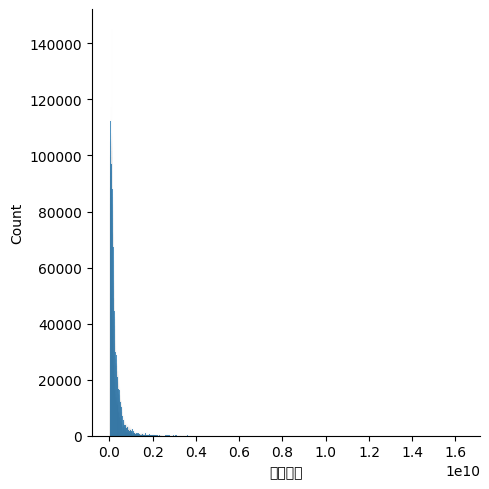

In [6]:
sns.displot(x='공시가격', kind='hist', data=df)
plt.show()

In [7]:
df = csv_test.drop(['시도','기준월','기준연도','법정동코드','도로명주소','시군구','읍면','특수지코드','본번','부번','특수지명','동리', '단지명', '동명', '호명','단지코드','동코드','호코드'], axis=1)
df

,전용면적,공시가격
0,187.4900,918000000
1,187.4900,918000000
2,157.2500,859000000
3,157.2500,859000000
4,152.3300,859000000
...,...,...
14204660,63.6582,163000000
14204661,63.6582,165000000
14204662,63.6582,165000000
14204663,63.6582,165000000


In [13]:
q1 = df['공시가격'].quantile(q=0.25)
q3 = df['공시가격'].quantile(q=0.75)
iqr = q3 - q1
하한 = q1 - iqr *1.5
"광고비에 대한 하한 극단치 경계값: %f" % 하한

'광고비에 대한 하한 극단치 경계값: -247250000.000000'

In [14]:
df1 = df.query('공시가격 < @하한')
df1['공시가격']

Series([], Name: 공시가격, dtype: int64)

In [15]:
q1 = df['공시가격'].quantile(q=0.25)
q3 = df['공시가격'].quantile(q=0.75)
iqr = q3 - q1
상한 = q3 + iqr * 1.5
"매출액에 대한 상한 극단치 경계값: %f" % 상한

'매출액에 대한 상한 극단치 경계값: 644350000.000000'

In [17]:
df1 = df.query('공시가격 > @상한')
df1['공시가격']

0            918000000
1            918000000
2            859000000
3            859000000
4            859000000
               ...    
14203448    1374000000
14203449    1374000000
14203450    1381000000
14203451    1381000000
14203452    1381000000
Name: 공시가격, Length: 1011991, dtype: int64

In [18]:
def outliers_iqr(x):
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3- q1
    lower_bound = q1 -(iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound)|(x < lower_bound))

In [19]:
pay = outliers_iqr(df['공시가격'])[0]

[       0        1        2 ... 14203450 14203451 14203452]


In [20]:
data = []
for i in df.index:
    if i not in data:
        data.append(i)
print(data)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_14860\1682438339.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\

In [9]:
from sklearn.preprocessing import StandardScaler

# 표준화란 데이터의 평균을 0, 분산과 표준편차를 1로 만들어주는 것을 말하는데요,
# 표준화를 하는 이유는 다른 통계 데이터와 비교하는 데에 있어 용이하게 하기 위함입니다.

# StandardScaler 객체 생성
scaler = StandardScaler()

# standardSacler 로 데이터 셋 변환. fit()과 transfrom() ghcnf
scaler.fit(df)
scaled = scaler.transform(df)
df1 = pd.DataFrame(scaled)
df1

,0,1
0,4.172092,2.243166
1,4.172092,2.243166
2,3.092766,2.044066
3,3.092766,2.044066
4,2.917162,2.044066
...,...,...
14204660,-0.247710,-0.304640
14204661,-0.247710,-0.297891
14204662,-0.247710,-0.297891
14204663,-0.247710,-0.297891


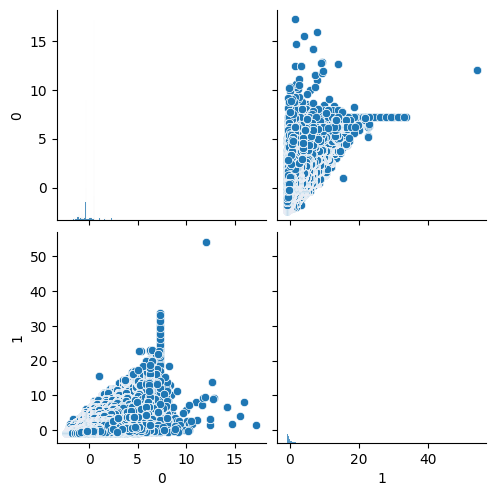

In [10]:
sns.pairplot(df1[[0, 1]])
plt.show()